In [116]:
print("PROBLEM 1: GET THE DATA")

PROBLEM 1: GET THE DATA


In [117]:
###
# This code is written by Dr. Fitz and modified by Zach Shelton
# at Florida Institute of Technology.
# Not For External Use

import json
import dateparser
import requests
from lxml import html
from datetime import datetime as date

#NOTE THIS CODE WAS RAN FROM A .PY saving to a SOU_data.txt for convenience,
#USE in Notebook at your own risk.

def get_html(url):
    """
    This function extracts the html code from a url
    :param url: 
    :return: html code from the web page referenced by url
    """
    response = requests.get(url)  # get page data from server, block redirects
    source_code = response.content  # get string of source code from response
    return source_code


def get_data_table(source_code):
    """
    This function creates a 2-D list of the following fields:
    [president_name, tenure, speech_link, speech_date, speech]
    The speech_date and speech are currently left blank.
    :param source_code: the html source code extracted from a url
    :return: a 2-D Python list or table
    """
    data_table = []
    speech_table = None
    trs = None
    html_elem = html.document_fromstring(source_code)  # make HTML element object
    tables = html_elem.cssselect("table")  # select the table element on the page

    # if you find a table, initialize the speech table to the first table
    if len(tables) > 0:
        speech_table = tables[0]

    # if you find the speech table, select its rows
    if speech_table is not None:
        trs = speech_table.cssselect("tr")

    # If you find rows in the table, go through each row
    # and process the data. Skip the header row (start at row 1)
    if trs is not None:
        for i in range(1, len(trs)):
            tr = trs[i]
            tds = tr.cssselect("td")
            president_name = ""

            # simple check to make sure the row has president name and speech url
            if len(tds) == 12:
                first_cell_data = tds[0].text_content().strip()
                tenure = tds[1].text_content().strip()
                # get the link element for the link to the speech
                speech_link_elmnt = tds[2].cssselect("a")
                speech_link = ""
                speech_date = ""
                speech = ""

                if len(first_cell_data) > 0:
                    president_name = first_cell_data

                if len(speech_link_elmnt) > 0:
                    speech_link = speech_link_elmnt[0].get("href")

                if len(president_name) > 0 and len(speech_link) > 0:
                    data_table.append([president_name, tenure, speech_link, speech_date, speech])
    return data_table


def scrape_data(url):
    """
    :param url: the url to 
    :return: 
    """
    return get_data_table(get_html(url))


def find_speech_date(data_table):
    """
    :param data_table
    :return: Nothing
    This function finds the date and speech content via the webpage in data[4] and a datetime string in
    data[3](data = each row of data_table)
    """
    for data in data_table:
        url = data[2]
        html_elem = html.document_fromstring(get_html(url))
        date_r = html_elem.cssselect('[class="date-display-single"]')
        date_obj = dateparser.parse(date_r[0].get("content"))
        val = html_elem.cssselect('[class="field-docs-content"]')
        speech = val[0].text_content()
        data[3] = date_obj.strftime('%x %X')
        data[4] = speech.strip("  ")
    return 0

def clean_speech(data_table):
    """
    :param data_table: 
    :return: cleaned speech data_table
    This function cleans the speech of new line characters.
    """
    for data in data_table:
        speech = data[4]
        lines = speech.splitlines()
        n_speech = ""
        for line in lines:
            n_speech = n_speech + line
        data[4] = ""
        data[4] = n_speech
    return data_table

def write_txt(data_table):
    """
    
    :param data_table: 
    :return: N/A
    Uses dump to save list and make it easier to grab again.
    """
    f = open("SOU_data.txt", 'w+')
    json.dump(data_table, f)
    f.close()
    return 0


def main():
    """
    The main driver of the program.
    It uses the base link to The American Presidency Project
    at UC Santa Barbara to extract SOU addresses
    """
    url = "https://www.presidency.ucsb.edu/" \
          "documents/presidential-documents-archive-guidebook/" \
          "annual-messages-congress-the-state-the-union"
    data_table = scrape_data(url)
    find_speech_date(data_table)
    clean_speech(data_table)
    write_txt(data_table)


# call the main function to run the program
main()

In [118]:
#
import json
f = open("SOU_data.txt","r")
data_table =json.load(f)
output_string = "{:<25}{:<12}{:<25}{:<30}"
print(output_string.format("Name","Tenure","Speech Time","    Excerpt"))
for data in data_table:
    print(output_string.format(data[0],data[1],data[3],data[4][0:30]))

Name                     Tenure      Speech Time                  Excerpt                   
Donald J. Trump          2017-pres.  02/28/17 21:09:00            Thank you very much. Mr. S
Barack Obama             2013-2017   02/12/13 21:15:00            Please, everybody, have a 
George W. Bush           2005-2009   02/02/05 21:10:00            Mr. Speaker, Vice Presiden
William J. Clinton       1997-2001   02/04/97 21:15:00            Mr. Speaker, Mr. Vice Pres
George Bush              1989-1993   02/09/89 00:00:00            Mr. Speaker, Mr. President
Ronald Reagan            1985-1989   02/06/85 21:05:00            Mr. Speaker, Mr. President
Lyndon B. Johnson        1965-1969   01/04/65 21:04:00            Mr. Speaker, Mr. President
John F. Kennedy          1961-1963   01/30/61 12:30:00            [As delivered in person be
Dwight D. Eisenhower     1957-1961   01/10/57 00:00:00            To the Congress of the Uni
Harry S Truman           1949-1953   01/05/49 13:00:00            Mr. 

In [119]:
print("PROBLEM 2: DATA ANALYSIS")

PROBLEM 2: DATA ANALYSIS


In [120]:
def count_sentences(data):
    speech = data
    words = speech.split()
    val=0
    for word in words:
        if word!= '' and word!='\n':
            if "." in word or "?" in word or "!" in word or ":" in word or ";" in word:
                val= val+1
    return val

def count_words(speech):
    count = speech.split()
    val = 0
    for word in count:
        if "." in word or "?" in word or "!" in word or ":" in word or ";" in word:
            val= val+2
        elif "-" in word:
            val=val+2
        else:
            val=val+1
    #print("Word is " + str(val))
    return val
def count_syllables(speech):
    repeat=''
    words = speech.split()
    '''Looks for vowels, technically y could considered a syllable but is ignored here,
     This should account for all words'''
    vowels = ['a','e','i','o','u','y']
    s_sum = 0
    for word in words:
        word.strip(' ')
        count= 0
        if len(word)!=0:
            for val in word:
                for vowel in vowels:
                    if val==vowel:
                        count=count+1
            if word[-1]=='e' and word[-2]=='l':
                count=count+1
            if word[-1]=='e':
                count = count-1
            elif len(word)>=2 and word[-2]=='e' and word[-1]=='s':
                count=count-1
            elif len(word)>=2 and word[-2]=='e' and word[-1]=='d':
                count=count-1
            elif count==0:
                count = count+1
            s_sum = count+s_sum
    #print("Syllable is " + str(s_sum))
    return s_sum

def compute_flesch_index(syllable_count, word_count, sentence_count):
    syll_per_word = (syllable_count/word_count)
    word_per_sentence =(word_count/sentence_count)
    ans=206.835-1.015*word_per_sentence-syll_per_word*84.6
    return round(ans,2)
def compute_grade_level(syllable_count, word_count, sentence_count):
    syll_per_word = (syllable_count/word_count)
    avg_sen_len =(word_count/sentence_count)
    return round((.39*avg_sen_len)+(11.8*syll_per_word)-15.59)
def classify_article_readability(level):
    if 100 >= level > 90:
        return "5th Grade"
    elif 90 >= level > 80:
        return "6th Grade"
    elif 80 >= level > 70:
        return "7th Grade"
    elif 70 >= level > 60:
        return "8th & 9th Grade"
    elif 60 >= level >50:
        return "10th to 12th Grade"
    elif 50>= level >30:
        return "College"
    else:
        return "College"
    

In [121]:
"""
Combining Above Functions to add additional info to data_table
"""
for data in data_table:
    data.append(compute_flesch_index(count_syllables(data[4]),count_words(data[4]),count_sentences(data[4])))
    data.append(compute_grade_level(count_syllables(data[4]),count_words(data[4]),count_sentences(data[4])))
    data.append(classify_article_readability(data[-2]))
output_string = "{:<25}{:<12}{:<15}{:<30}  {:<10} {:<15}{:<25}"
print(output_string.format("Name","Tenure","Speech Time","      Excerpt", "  Flesch", "  Grade Level #","  Grade Level","Grade"))
for data in data_table:
    print(output_string.format(data[0],data[1],data[3],data[4][0:30],data[5],data[6],data[7]))

Name                     Tenure      Speech Time          Excerpt                     Flesch     Grade Level #  Grade Level            
Donald J. Trump          2017-pres.  02/28/17 21:09:00    Thank you very much. Mr. S  56.96      10             10th to 12th Grade       
Barack Obama             2013-2017   02/12/13 21:15:00    Please, everybody, have a   57.2       10             10th to 12th Grade       
George W. Bush           2005-2009   02/02/05 21:10:00    Mr. Speaker, Vice Presiden  46.28      12             College                  
William J. Clinton       1997-2001   02/04/97 21:15:00    Mr. Speaker, Mr. Vice Pres  57.37      10             10th to 12th Grade       
George Bush              1989-1993   02/09/89 00:00:00    Mr. Speaker, Mr. President  62.9       8              8th & 9th Grade          
Ronald Reagan            1985-1989   02/06/85 21:05:00    Mr. Speaker, Mr. President  51.71      10             10th to 12th Grade       
Lyndon B. Johnson        1965-1969  

In [122]:
print("PROBLEM 3: Visualization")

PROBLEM 3: Visualization


<BarContainer object of 15 artists>

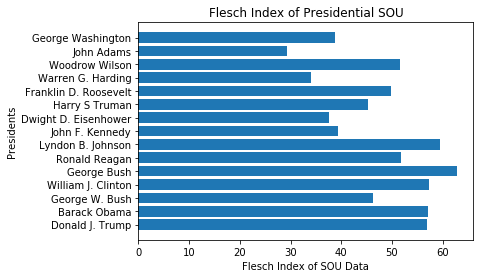

In [123]:
from matplotlib import pyplot as plt
f_data = []
f_names = []
for data in data_table:
    f_data.append(data[5])
    f_names.append(data[0])
fig,ax = plt.subplots()
plt.xlabel("Flesch Index of SOU Data")
plt.ylabel("Presidents")
plt.title("Flesch Index of Presidential SOU")
plt.barh(f_names,f_data, label = 'President Names')